# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [16]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [14]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [15]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components' : [4,10,20,30,40,50,64],
    'logistic__alpha' : np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv = 5, return_train_score=False)
search.fit(X_digits,y_digits)
print(search.best_params_)

{'logistic__alpha': 0.01, 'pca__n_components': 30}


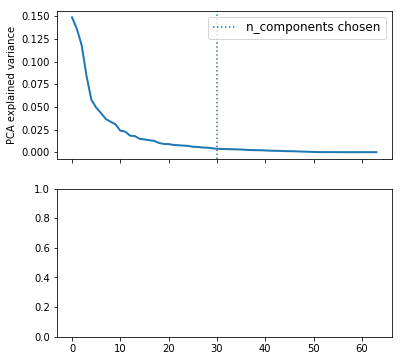

In [17]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))


In [18]:
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [8]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.116822,0.017613,0.000397,4.858912e-04,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.692308,0.541436,0.688022,0.714286,0.664789,0.660168,0.061410,14
1,0.081390,0.009148,0.000803,4.013446e-04,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.892857,0.848066,0.877437,0.899160,0.859155,0.875335,0.019414,12
2,0.111509,0.015087,0.000801,4.004632e-04,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.928571,0.842541,0.902507,0.932773,0.878873,0.897053,0.033470,8
3,0.130524,0.006254,0.000597,4.874206e-04,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.925824,0.864641,0.919220,0.955182,0.890141,0.911002,0.031060,3
4,0.159035,0.015891,0.000796,3.978162e-04,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.842541,0.930362,0.927171,0.881690,0.899320,0.033210,7
5,0.185368,0.006535,0.001003,3.366349e-06,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.853591,0.930362,0.952381,0.878873,0.906009,0.035511,5
6,0.163552,0.008898,0.001001,1.907349e-07,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.856354,0.922006,0.949580,0.876056,0.903766,0.033376,6
7,0.057853,0.006977,0.000200,4.005432e-04,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.780220,0.734807,0.807799,0.789916,0.757746,0.774098,0.025435,13
8,0.063658,0.009077,0.000801,4.004718e-04,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.906593,0.861878,0.896936,0.907563,0.839437,0.882481,0.027191,11
9,0.108700,0.021023,0.000401,4.906217e-04,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.928571,0.872928,0.910864,0.949580,0.881690,0.908727,0.028565,4
